<a href="https://colab.research.google.com/github/aarch23/Time-Series-Forecasting-Activity/blob/main/Market_Opportunity_Alpaca_Scarves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Assessing Market Opportunities for Alpaca Wool Scarves

In this activity, you’ll use time series forecasting to analyze Google Trends data. The purpose will be to validate market opportunities to help the Aymara indigenous people in Bolivia export alpaca wool scarves to different countries or regions.

You’ll continue collaborating with the International Co-operative Alliance. But now, you’ll use Prophet to validate prospective market opportunities

Instructions

1. Read the Google Trends data into a Pandas DataFrame, and then plot the general trends.

2. Prepare the data to fit the Prophet model. Create two new DataFrames: one for Canada and another for Uruguay. Recall setting the column names to “ds” for the dates and “y” for the trend values.

3. Create two Prophet models, one for each country.

4. Fit the Prophet models.

5. Use the `make_future_dataframe` function to forecast one year of trend dates.

    > **Hint** Google Trends data is collected weekly. So, set the `freq` parameter to `W`, and set `periods=52` (because one year has 52 weeks).

6. Predict the future trends data by using the `predict` method for both the Canada and Uruguay models. 

7. Plot Prophet’s predictions by using the `plot` function. Pass the forecasts for Canada and Uruguay, respectively, as the parameters. 

8. Analyze the forecast results by plotting the forecast DataFrame's “yhat”, “yhat_lower”, and “yhat_upper” columns for each the Canadian and Uruguay models. Set the “ds” column as the DataFrame index before creating these plots.

9. Use the `plot_component` function from the Prophet models to analyze the patterns of the Google Trends times series data for the Canada and Uruguay models. Be sure to reset the index by converting “ds” back to a column before creating these plots. 

References

[Prophet Python API](https://facebook.github.io/prophet/docs/quick_start.html#python-api)

[Pandas rename function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)


In [1]:
# Install the required libraries
!pip install pystan
!pip install fbprophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Read the Google Trends data into a Pandas DataFrame, and then plot the general trends.

In [3]:
# Read the data from the scarf-google-trends-data.csv file into a Pandas DataFrame
from google.colab import files
uploaded = files.upload()

df_alpaca = pd.read_csv("scarf-google-trends-data.csv")

# Review the DataFrame
df_alpaca.head()

Saving scarf-google-trends-data.csv to scarf-google-trends-data.csv


,week,canada,uruguay
0,11/8/15,74,17
1,11/15/15,81,17
2,11/22/15,94,17
3,11/29/15,92,0
4,12/6/15,87,18


## Step 2: Prepare the data to fit the Prophet model. Create two new DataFrames: one for Canada and another for Uruguay. Recall setting the column names to “ds” for the dates and “y” for the trend values.


In [8]:
# Create a DataFrame for Canada to include the week and canada columns
df_canada = df_alpaca[["week","canada"]]

# Rename the columns to the Prophet model syntax 
df_canada = df_canada.rename(columns={"week":"ds", "canada":"y"})

# Review the Canada DataFrame
df_canada.head()

,ds,y
0,11/8/15,74
1,11/15/15,81
2,11/22/15,94
3,11/29/15,92
4,12/6/15,87


In [18]:
# # Create a DataFrame for Uruguay to include the week and uruguay columns
df_uruguay = df_alpaca[["week", "uruguay"]]

# Rename the columns to the Prophet model syntax 
df_uruguay = df_uruguay.rename(columns={"week":"ds", "uruguay":"y"})

# Review the Uruguay DataFrame
df_uruguay.head()


,ds,y
0,11/8/15,17
1,11/15/15,17
2,11/22/15,17
3,11/29/15,0
4,12/6/15,18


## Step 3: Create two Prophet models, one for each country

In [20]:
# Create a Prophet model for Canada
model_canada = Prophet()


In [21]:
# Create a Prophet model for Uruguay
model_uruguay = Prophet()


## Step 4: Fit the Prophet models

In [22]:
# Fit the Canada Prophet model
model_canada.fit(df_canada)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
# Fit the Uruguay Prophet model
model_uruguay.fit(df_uruguay)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Step 5: Use the `make_future_dataframe` function to forecast one year of trend dates.

> **Hint** Google Trends data is collected weekly. So, set the `freq` parameter to `W`, and set `periods=52` (because one year has 52 weeks).


In [25]:
# Forecast one year of weekly future trends data for Canada 
future_canada = model_canada.make_future_dataframe(periods=52, freq="W")

# Display the last five rows of the future_canada DataFrame
future_canada.tail()

,ds
307,2021-09-26
308,2021-10-03
309,2021-10-10
310,2021-10-17
311,2021-10-24


In [26]:
# Forecast one year of weekly future trends data for Uruguay 
future_uruguay = model_uruguay.make_future_dataframe(periods=52, freq="W")

# Display the last five rows of the future_uruguay DataFrame
future_uruguay.tail()


,ds
307,2021-09-26
308,2021-10-03
309,2021-10-10
310,2021-10-17
311,2021-10-24


## Step 6: Predict the future trends data by using the `predict` method for both the Canada and Uruguay models. 

In [27]:
# Make predictions for Canada using the future_canada DataFrame
forecast_canada = model_canada.predict(future_canada)

# Display the first five rows of the forecast_canada DataFrame
forecast_canada.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,46.046115,68.020040,81.125377,46.046115,46.046115,28.544840,28.544840,28.544840,28.544840,28.544840,28.544840,0.0,0.0,0.0,74.590955
1,2015-11-15,45.949933,72.429305,85.667069,45.949933,45.949933,32.937274,32.937274,32.937274,32.937274,32.937274,32.937274,0.0,0.0,0.0,78.887207
2,2015-11-22,45.853751,75.974630,88.132180,45.853751,45.853751,36.023778,36.023778,36.023778,36.023778,36.023778,36.023778,0.0,0.0,0.0,81.877529
3,2015-11-29,45.757569,78.115770,91.027994,45.757569,45.757569,38.865473,38.865473,38.865473,38.865473,38.865473,38.865473,0.0,0.0,0.0,84.623042
4,2015-12-06,45.661387,80.957213,93.895847,45.661387,45.661387,41.701658,41.701658,41.701658,41.701658,41.701658,41.701658,0.0,0.0,0.0,87.363045


In [28]:
# Make predictions for Uruguay using the future_uruguay DataFrame
forecast_uruguay = model_uruguay.predict(future_uruguay)

# Display the first five rows of the forecast_uruguay DataFrame
forecast_uruguay.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,33.346622,8.077338,43.682680,33.346622,33.346622,-7.082872,-7.082872,-7.082872,-7.082872,-7.082872,-7.082872,0.0,0.0,0.0,26.263750
1,2015-11-15,33.301449,6.398953,40.677753,33.301449,33.301449,-10.347964,-10.347964,-10.347964,-10.347964,-10.347964,-10.347964,0.0,0.0,0.0,22.953485
2,2015-11-22,33.256275,0.304738,35.162994,33.256275,33.256275,-15.895374,-15.895374,-15.895374,-15.895374,-15.895374,-15.895374,0.0,0.0,0.0,17.360902
3,2015-11-29,33.211102,-4.176046,31.537117,33.211102,33.211102,-19.477136,-19.477136,-19.477136,-19.477136,-19.477136,-19.477136,0.0,0.0,0.0,13.733966
4,2015-12-06,33.165929,-3.280170,31.969605,33.165929,33.165929,-18.472727,-18.472727,-18.472727,-18.472727,-18.472727,-18.472727,0.0,0.0,0.0,14.693202


## Step 7: Plot Prophet’s predictions by using the `plot` function. Pass the forecasts for Canada and Uruguay, respectively, as the parameters. 

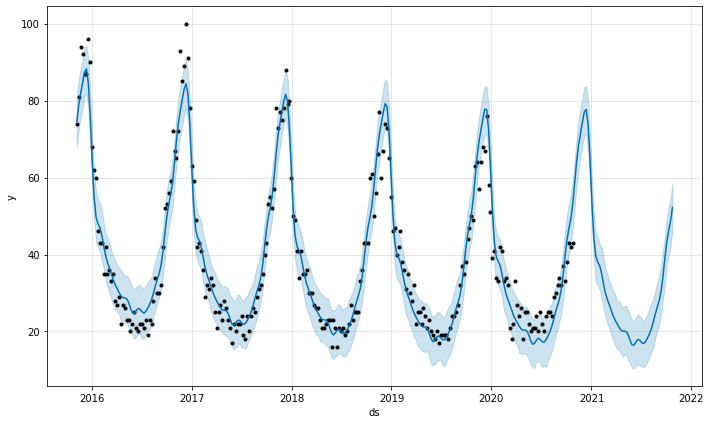

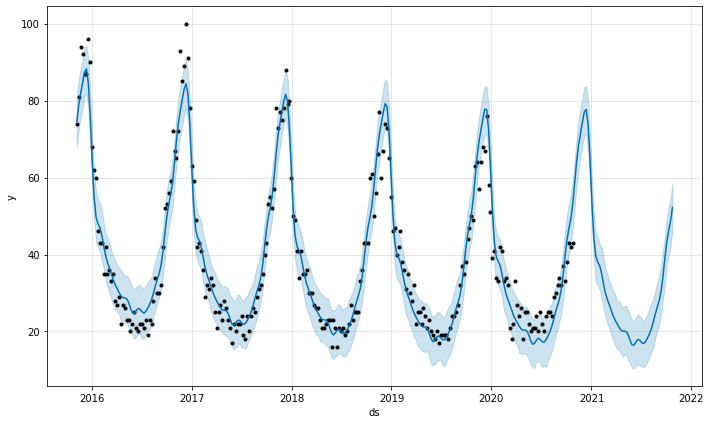

In [29]:
# Plot the Prophet predictions for Canada 
model_canada.plot(forecast_canada)


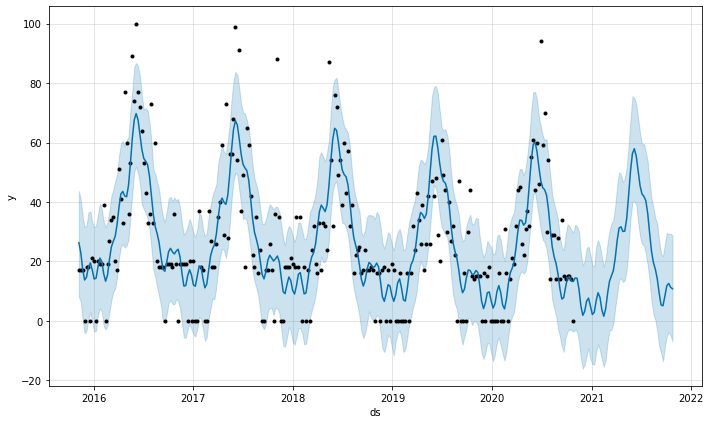

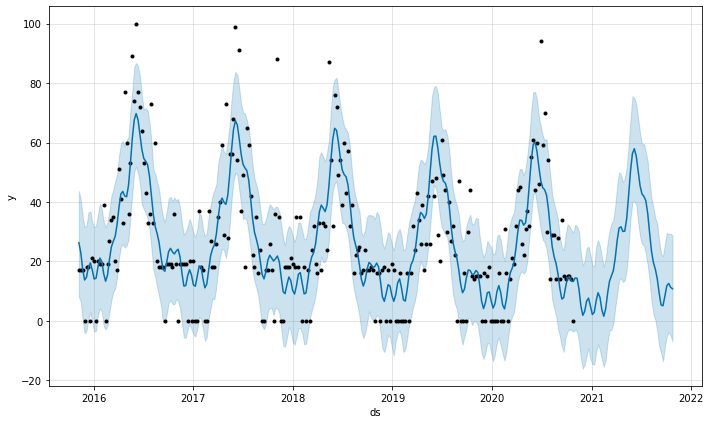

In [30]:
# Plot the Prophet predictions for Uruguay 

model_uruguay.plot(forecast_uruguay)


## Step 8: Analyze the forecast results by plotting the forecast DataFrame's “yhat”, “yhat_lower”, and “yhat_upper” columns for each the Canadian and Uruguay models. Set the “ds” column as the DataFrame index before creating these plots.

In [31]:
# Set the index in the forecast_canada DataFrame to the ds datetime column 
forecast_canada = forecast_canada.set_index("ds")

# Display the forecast_canada DataFrame
forecast_canada.head()


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2015-11-08,46.046115,68.020040,81.125377,46.046115,46.046115,28.544840,28.544840,28.544840,28.544840,28.544840,28.544840,0.0,0.0,0.0,74.590955
2015-11-15,45.949933,72.429305,85.667069,45.949933,45.949933,32.937274,32.937274,32.937274,32.937274,32.937274,32.937274,0.0,0.0,0.0,78.887207
2015-11-22,45.853751,75.974630,88.132180,45.853751,45.853751,36.023778,36.023778,36.023778,36.023778,36.023778,36.023778,0.0,0.0,0.0,81.877529
2015-11-29,45.757569,78.115770,91.027994,45.757569,45.757569,38.865473,38.865473,38.865473,38.865473,38.865473,38.865473,0.0,0.0,0.0,84.623042
2015-12-06,45.661387,80.957213,93.895847,45.661387,45.661387,41.701658,41.701658,41.701658,41.701658,41.701658,41.701658,0.0,0.0,0.0,87.363045


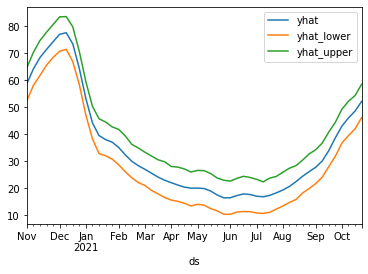

In [34]:
# Plot predictions for our forecast_canada DataFrame for the 52 week period 

forecast_canada[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:].plot()

In [35]:
# Set the index in the forecast_uruguay DataFrame to the ds datetime column 
forecast_uruguay = forecast_uruguay.set_index('ds')

# Display the forecast_uruguay DataFrame
forecast_uruguay.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2015-11-08,33.346622,8.077338,43.682680,33.346622,33.346622,-7.082872,-7.082872,-7.082872,-7.082872,-7.082872,-7.082872,0.0,0.0,0.0,26.263750
2015-11-15,33.301449,6.398953,40.677753,33.301449,33.301449,-10.347964,-10.347964,-10.347964,-10.347964,-10.347964,-10.347964,0.0,0.0,0.0,22.953485
2015-11-22,33.256275,0.304738,35.162994,33.256275,33.256275,-15.895374,-15.895374,-15.895374,-15.895374,-15.895374,-15.895374,0.0,0.0,0.0,17.360902
2015-11-29,33.211102,-4.176046,31.537117,33.211102,33.211102,-19.477136,-19.477136,-19.477136,-19.477136,-19.477136,-19.477136,0.0,0.0,0.0,13.733966
2015-12-06,33.165929,-3.280170,31.969605,33.165929,33.165929,-18.472727,-18.472727,-18.472727,-18.472727,-18.472727,-18.472727,0.0,0.0,0.0,14.693202


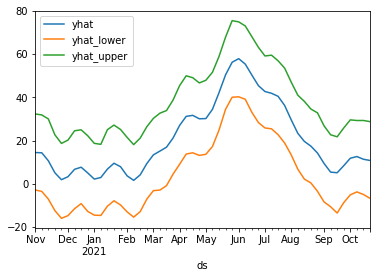

In [36]:
# Plot predictions for our forecast_uruguay DataFrame for the 52 week period 

forecast_uruguay[['yhat', 'yhat_lower','yhat_upper']].iloc[-52:,:].plot()


## Step 9: Use the `plot_component` function from the Prophet models to analyze the patterns of the Google Trends times series data for the Canada and Uruguay models. Be sure to reset the index by converting “ds” back to a column before creating these plots.

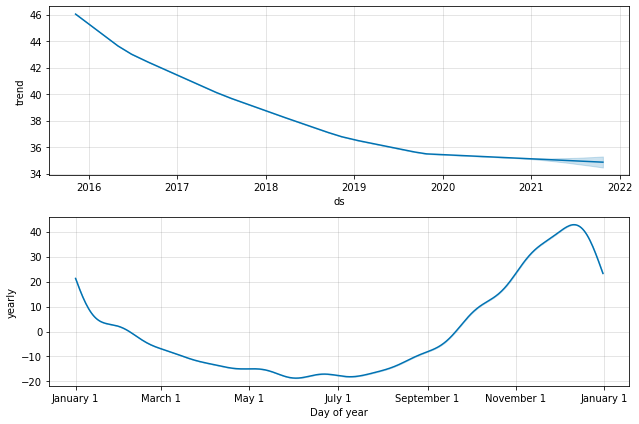

In [37]:
# Reset the index in the forecast_canada DataFrame
forecast_canada = forecast_canada.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame

fig2 = model_canada.plot_components(forecast_canada)


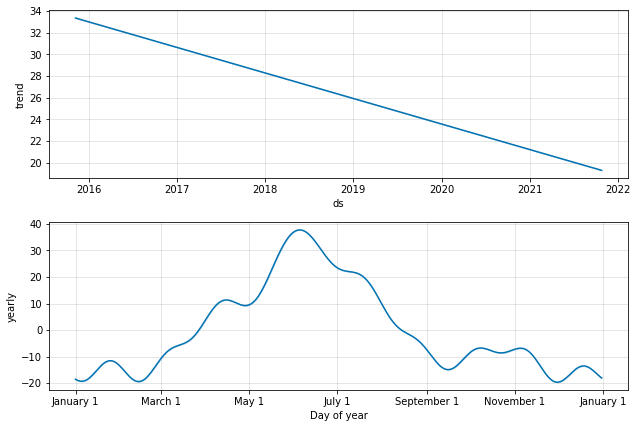

In [38]:
# Reset the index in the forecast_uruguay DataFrame
forecast_uruguay = forecast_uruguay.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_uruguay DataFrame

fig3 = model_uruguay.plot_components(forecast_uruguay)
